<a href="https://colab.research.google.com/github/sunshineluyao/AMPL/blob/main/ML_Sketches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Basics

### Analysis Outline

1. **Data Generation and Visualization**:
   - First, we introduce the data generation process for each type of analysis and visualize the generated data.
  
2. **Analysis and Results**:
   - Next, we conduct the relevant analysis for each scenario, with appropriate visualizations to understand the results.
  
3. **Comparison with the True Data Generating Process**:
   - Finally, we compare the analysis results with the true data generating process to assess the accuracy and insights of each model or method used.

---

### 1. Natural Language Processing and Social Network Study

#### Data Generation Process

In this step, we simulate a social network of 200 nodes, with edges randomly connecting nodes based on a probability threshold. Additionally, each node is assigned a text post based on one of several thematic topics (e.g., “technology,” “politics”). We generate text data with these themes embedded, creating a context for a network-based topic analysis.

#### Data Visualization

We visualize the network structure to see the connections and examine the distribution of node degrees, providing insights into which nodes are most connected or central.

#### Code and Visualization

```python
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate the social network
np.random.seed(42)
n_nodes = 200
p_connection = 0.05
G = nx.erdos_renyi_graph(n=n_nodes, p=p_connection)

# Visualize the network
plt.figure(figsize=(10, 6))
nx.draw(G, node_size=50, node_color='skyblue', with_labels=False)
plt.title("Simulated Social Network")
plt.show()

# Analyze node degree distribution
node_degrees = [deg for _, deg in G.degree()]
plt.hist(node_degrees, bins=15, color="skyblue", edgecolor="black")
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
```

#### NLP Analysis

For the NLP part, we employ Latent Dirichlet Allocation (LDA) to analyze topic distributions in the generated text.

---

### 2. Prediction with Machine Learning

#### Data Generation Process

We simulate a dataset with three features (`X1`, `X2`, and `X3`) and an outcome variable (`y`) defined as a linear combination of the features, with added noise. This linear relationship gives us the opportunity to evaluate a machine learning model’s ability to predict outcomes accurately.

```python
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 500
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)
y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 1, n_samples)

# Combine into DataFrame
prediction_df = pd.DataFrame({
    'Feature_1': X1,
    'Feature_2': X2,
    'Feature_3': X3,
    'Outcome': y
})
```

#### Data Visualization

To understand the relationship between features and outcome, we can plot `y` against each feature.

```python
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, feature in enumerate(['Feature_1', 'Feature_2', 'Feature_3']):
    axs[i].scatter(prediction_df[feature], prediction_df['Outcome'], alpha=0.5)
    axs[i].set_title(f"Outcome vs {feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Outcome")

plt.tight_layout()
plt.show()
```

#### Machine Learning Analysis

Using a linear regression model, we predict the outcome variable and compare the predicted coefficients to the true coefficients used in the data generation.

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train/test split
X = prediction_df[['Feature_1', 'Feature_2', 'Feature_3']]
y = prediction_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients comparison
model_coefficients = model.coef_
print(f"True Coefficients: [3, 2, -1]")
print(f"Estimated Coefficients: {model_coefficients}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
```

#### Visualization of Results

```python
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Outcome")
plt.ylabel("Predicted Outcome")
plt.title("True vs Predicted Outcome")
plt.show()
```

### 3. Causal Inference

#### Data Generation Process

We simulate data with a binary treatment indicator and an outcome variable influenced by both treatment and confounding factors. This setup helps us explore the estimated treatment effect.

```python
np.random.seed(42)
n = 500
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
treatment = np.random.binomial(1, 0.5, n)
y = 5 * treatment + 2 * X1 + np.random.normal(0, 1, n)
```

#### Causal Inference Analysis with Propensity Score Matching

```python
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Propensity score model
propensity_model = LogisticRegression()
propensity_model.fit(np.column_stack([X1, X2]), treatment)
propensity_scores = propensity_model.predict_proba(np.column_stack([X1, X2]))[:, 1]

# Nearest neighbor matching
treated_indices = np.where(treatment == 1)[0]
control_indices = np.where(treatment == 0)[0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(propensity_scores[control_indices].reshape(-1, 1))
distances, indices = nn.kneighbors(propensity_scores[treated_indices].reshape(-1, 1))
matched_controls = control_indices[indices.flatten()]

# Calculate Average Treatment Effect on the Treated (ATT)
att = (y[treated_indices] - y[matched_controls]).mean()
print(f"Estimated ATT: {att}")
print(f"True Treatment Effect: 5")
```

### 4. Multi-Objective Optimization

#### Data Generation Process

For the multi-objective optimization, we define two objectives: one to maximize and another to minimize, creating a trade-off scenario where we aim to balance the objectives.

```python
import numpy as np

def multi_objective_environment(x):
    objective_1 = np.sin(x[0]) + np.cos(x[1])  # Maximization
    objective_2 = (x[0] - 1)**2 + (x[1] - 1)**2  # Minimization
    return objective_1, objective_2

candidates = np.random.rand(100, 2) * 10 - 5
objectives = np.array([multi_objective_environment(c) for c in candidates])
```

#### Pareto Front Visualization

Using the calculated objectives, we identify Pareto-optimal solutions.

```python
pareto_front = []
for i, (obj1, obj2) in enumerate(objectives):
    if not any((other_obj1 >= obj1 and other_obj2 <= obj2) for other_obj1, other_obj2 in objectives):
        pareto_front.append(candidates[i])

pareto_front = np.array(pareto_front)

plt.scatter(objectives[:, 0], objectives[:, 1], alpha=0.5, label="All Candidates")
if pareto_front.size > 0:
    pareto_objectives = np.array([multi_objective_environment(p) for p in pareto_front])
    plt.scatter(pareto_objectives[:, 0], pareto_objectives[:, 1], color='red', label="Pareto Front")
plt.xlabel("Objective 1 (Maximize)")
plt.ylabel("Objective 2 (Minimize)")
plt.title("Multi-Objective Optimization")
plt.legend()
plt.show()
```

This comprehensive approach covers data generation, analysis, and comparison with true values for each type of study.

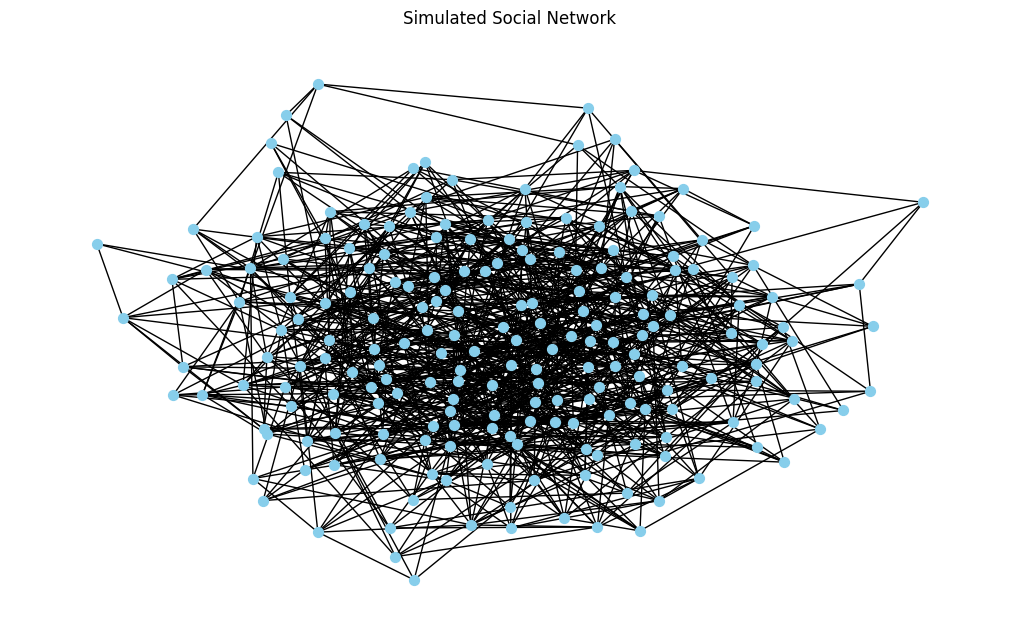

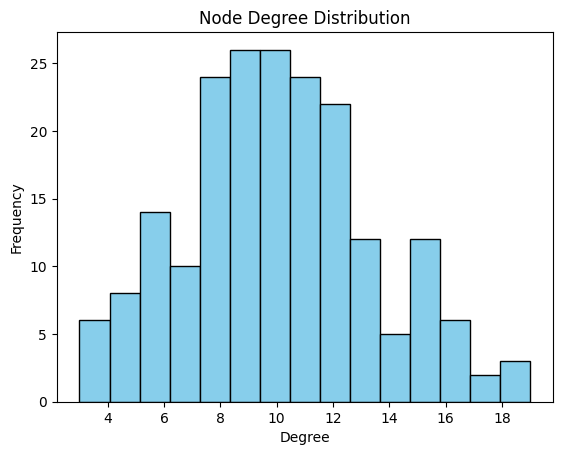

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate the social network
np.random.seed(42)
n_nodes = 200
p_connection = 0.05
G = nx.erdos_renyi_graph(n=n_nodes, p=p_connection)

# Visualize the network
plt.figure(figsize=(10, 6))
nx.draw(G, node_size=50, node_color='skyblue', with_labels=False)
plt.title("Simulated Social Network")
plt.show()

# Analyze node degree distribution
node_degrees = [deg for _, deg in G.degree()]
plt.hist(node_degrees, bins=15, color="skyblue", edgecolor="black")
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


In [22]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 500
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)
y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 1, n_samples)

# Combine into DataFrame
prediction_df = pd.DataFrame({
    'Feature_1': X1,
    'Feature_2': X2,
    'Feature_3': X3,
    'Outcome': y
})


In [23]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 500
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)
y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 1, n_samples)

# Combine into DataFrame
prediction_df = pd.DataFrame({
    'Feature_1': X1,
    'Feature_2': X2,
    'Feature_3': X3,
    'Outcome': y
})


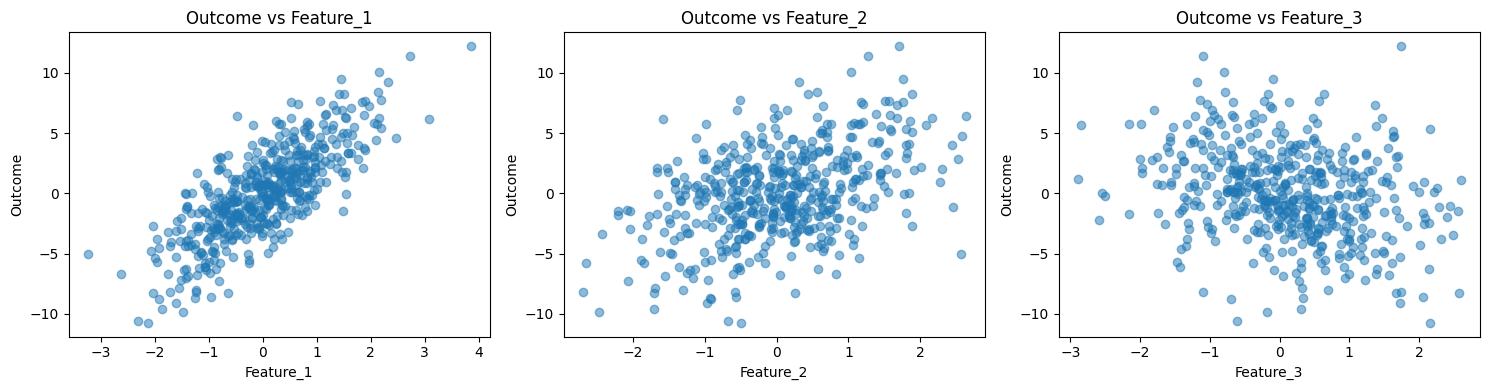

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, feature in enumerate(['Feature_1', 'Feature_2', 'Feature_3']):
    axs[i].scatter(prediction_df[feature], prediction_df['Outcome'], alpha=0.5)
    axs[i].set_title(f"Outcome vs {feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Outcome")

plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train/test split
X = prediction_df[['Feature_1', 'Feature_2', 'Feature_3']]
y = prediction_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients comparison
model_coefficients = model.coef_
print(f"True Coefficients: [3, 2, -1]")
print(f"Estimated Coefficients: {model_coefficients}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


True Coefficients: [3, 2, -1]
Estimated Coefficients: [ 3.07545307  1.97510134 -1.0367094 ]
Mean Squared Error: 1.0362251365585669
R-squared: 0.9127894855899827


In [26]:
np.random.seed(42)
n = 500
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
treatment = np.random.binomial(1, 0.5, n)
y = 5 * treatment + 2 * X1 + np.random.normal(0, 1, n)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Propensity score model
propensity_model = LogisticRegression()
propensity_model.fit(np.column_stack([X1, X2]), treatment)
propensity_scores = propensity_model.predict_proba(np.column_stack([X1, X2]))[:, 1]

# Nearest neighbor matching
treated_indices = np.where(treatment == 1)[0]
control_indices = np.where(treatment == 0)[0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(propensity_scores[control_indices].reshape(-1, 1))
distances, indices = nn.kneighbors(propensity_scores[treated_indices].reshape(-1, 1))
matched_controls = control_indices[indices.flatten()]

# Calculate Average Treatment Effect on the Treated (ATT)
att = (y[treated_indices] - y[matched_controls]).mean()
print(f"Estimated ATT: {att}")
print(f"True Treatment Effect: 5")


Estimated ATT: 5.195001558189697
True Treatment Effect: 5


In [28]:
import numpy as np

def multi_objective_environment(x):
    objective_1 = np.sin(x[0]) + np.cos(x[1])  # Maximization
    objective_2 = (x[0] - 1)**2 + (x[1] - 1)**2  # Minimization
    return objective_1, objective_2

candidates = np.random.rand(100, 2) * 10 - 5
objectives = np.array([multi_objective_environment(c) for c in candidates])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


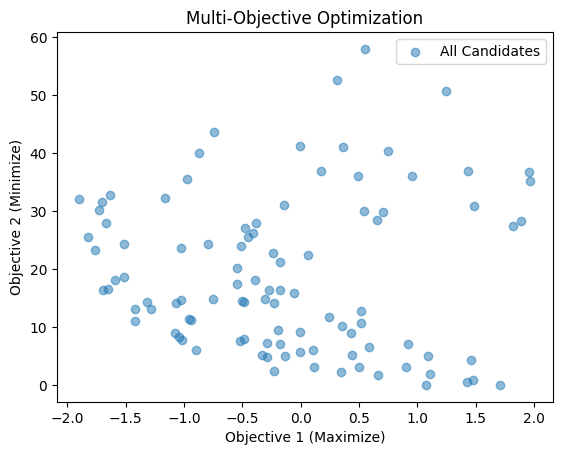

In [29]:
pareto_front = []
for i, (obj1, obj2) in enumerate(objectives):
    if not any((other_obj1 >= obj1 and other_obj2 <= obj2) for other_obj1, other_obj2 in objectives):
        pareto_front.append(candidates[i])

pareto_front = np.array(pareto_front)

plt.scatter(objectives[:, 0], objectives[:, 1], alpha=0.5, label="All Candidates")
if pareto_front.size > 0:
    pareto_objectives = np.array([multi_objective_environment(p) for p in pareto_front])
    plt.scatter(pareto_objectives[:, 0], pareto_objectives[:, 1], color='red', label="Pareto Front")
plt.xlabel("Objective 1 (Maximize)")
plt.ylabel("Objective 2 (Minimize)")
plt.title("Multi-Objective Optimization")
plt.legend()
plt.show()




### 5. AI Ethics

To evaluate fairness in a machine learning model, let’s create a synthetic dataset with an **outcome variable** influenced by **demographic attributes**. Then, we’ll train a model and assess its fairness across demographic groups using common metrics like **demographic parity** and **equalized odds**.

1. **Data Generation**: Simulate a dataset with features including a sensitive attribute (e.g., gender or race) that may influence the model outcome.
2. **Model Training**: Train a binary classification model (e.g., logistic regression) to predict the outcome.
3. **Fairness Evaluation**: Calculate fairness metrics to evaluate whether the model performs differently across demographic groups.

---

#### Code Example

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Data Generation
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 60, n_samples)
income = np.random.normal(50000, 15000, n_samples)
gender = np.random.choice([0, 1], size=n_samples)  # 0 for Male, 1 for Female

# Generate an outcome influenced by features, introducing some bias
# For example, higher income and age increase the probability of positive outcome,
# and adding a slight bias for males
bias = 0.3 * gender  # Adds a 0.3 positive shift to females
prob = 1 / (1 + np.exp(-0.01 * (age - 30) + 0.0001 * (income - 30000) + bias))
outcome = np.random.binomial(1, prob)

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Gender': gender,
    'Outcome': outcome
})

# Step 2: Model Training
X = df[['Age', 'Income', 'Gender']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 3: Fairness Evaluation
# Calculate demographic parity and equalized odds for the "Gender" attribute

# Demographic Parity: Check if positive outcome rates are similar across genders
positive_rate_male = y_pred[X_test['Gender'] == 0].mean()
positive_rate_female = y_pred[X_test['Gender'] == 1].mean()

# Equalized Odds: Check if TPR and FPR are similar across genders
conf_matrix_male = confusion_matrix(y_test[X_test['Gender'] == 0], y_pred[X_test['Gender'] == 0])
conf_matrix_female = confusion_matrix(y_test[X_test['Gender'] == 1], y_pred[X_test['Gender'] == 1])

# TPR and FPR for males
TPR_male = conf_matrix_male[1, 1] / (conf_matrix_male[1, 1] + conf_matrix_male[1, 0])
FPR_male = conf_matrix_male[0, 1] / (conf_matrix_male[0, 1] + conf_matrix_male[0, 0])

# TPR and FPR for females
TPR_female = conf_matrix_female[1, 1] / (conf_matrix_female[1, 1] + conf_matrix_female[1, 0])
FPR_female = conf_matrix_female[0, 1] / (conf_matrix_female[0, 1] + conf_matrix_female[0, 0])

# Results
fairness_metrics = {
    "Positive Rate Male": positive_rate_male,
    "Positive Rate Female": positive_rate_female,
    "TPR Male": TPR_male,
    "FPR Male": FPR_male,
    "TPR Female": TPR_female,
    "FPR Female": FPR_female
}
fairness_metrics
```

#### Explanation of Fairness Metrics

- **Demographic Parity**: A model achieves demographic parity if the rate of positive predictions is the same across demographic groups. Here, we calculate the positive outcome rate for males and females to see if there’s any disparity.

- **Equalized Odds**: A model satisfies equalized odds if both the **True Positive Rate (TPR)** and **False Positive Rate (FPR)** are the same across groups. We calculate TPR and FPR for both males and females.

This provides an overview of potential biases in the model and its fairness across demographic groups. Let me know if you'd like further insights or adjustments.

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Data Generation
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 60, n_samples)
income = np.random.normal(50000, 15000, n_samples)
gender = np.random.choice([0, 1], size=n_samples)  # 0 for Male, 1 for Female

# Generate an outcome influenced by features, introducing some bias
# For example, higher income and age increase the probability of positive outcome,
# and adding a slight bias for males
bias = 0.3 * gender  # Adds a 0.3 positive shift to females
prob = 1 / (1 + np.exp(-0.01 * (age - 30) + 0.0001 * (income - 30000) + bias))
outcome = np.random.binomial(1, prob)

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Gender': gender,
    'Outcome': outcome
})

# Step 2: Model Training
X = df[['Age', 'Income', 'Gender']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 3: Fairness Evaluation
# Calculate demographic parity and equalized odds for the "Gender" attribute

# Demographic Parity: Check if positive outcome rates are similar across genders
positive_rate_male = y_pred[X_test['Gender'] == 0].mean()
positive_rate_female = y_pred[X_test['Gender'] == 1].mean()

# Equalized Odds: Check if TPR and FPR are similar across genders
conf_matrix_male = confusion_matrix(y_test[X_test['Gender'] == 0], y_pred[X_test['Gender'] == 0])
conf_matrix_female = confusion_matrix(y_test[X_test['Gender'] == 1], y_pred[X_test['Gender'] == 1])

# TPR and FPR for males
TPR_male = conf_matrix_male[1, 1] / (conf_matrix_male[1, 1] + conf_matrix_male[1, 0])
FPR_male = conf_matrix_male[0, 1] / (conf_matrix_male[0, 1] + conf_matrix_male[0, 0])

# TPR and FPR for females
TPR_female = conf_matrix_female[1, 1] / (conf_matrix_female[1, 1] + conf_matrix_female[1, 0])
FPR_female = conf_matrix_female[0, 1] / (conf_matrix_female[0, 1] + conf_matrix_female[0, 0])

# Results
fairness_metrics = {
    "Positive Rate Male": positive_rate_male,
    "Positive Rate Female": positive_rate_female,
    "TPR Male": TPR_male,
    "FPR Male": FPR_male,
    "TPR Female": TPR_female,
    "FPR Female": FPR_female
}
fairness_metrics


{'Positive Rate Male': 0.12903225806451613,
 'Positive Rate Female': 0.06206896551724138,
 'TPR Male': 0.3870967741935484,
 'FPR Male': 0.06451612903225806,
 'TPR Female': 0.24,
 'FPR Female': 0.025}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-31-6db995c54a25>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['TPR Male', 'FPR Male', 'TPR Female', 'FPR Female'], rotation=45)


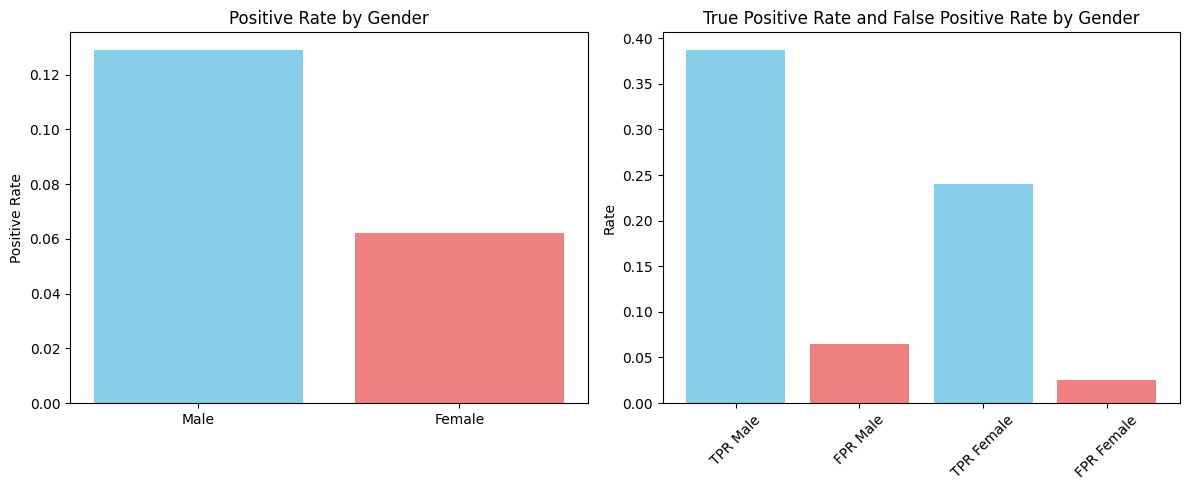

In [31]:
# Adjusted plotting to avoid pivoting issues by separating TPR and FPR into individual bars
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Organize data for plotting
metrics_df = pd.DataFrame.from_dict(fairness_metrics, orient='index', columns=['Value'])
metrics_df['Metric Type'] = ['Positive Rate' if 'Positive' in metric else 'TPR/FPR' for metric in metrics_df.index]
metrics_df['Gender'] = ['Male' if 'Male' in metric else 'Female' for metric in metrics_df.index]


# Plot Positive Rate by gender
positive_rate_data = metrics_df[metrics_df['Metric Type'] == 'Positive Rate']
axs[0].bar(positive_rate_data['Gender'], positive_rate_data['Value'], color=['skyblue', 'lightcoral'])
axs[0].set_title("Positive Rate by Gender")
axs[0].set_ylabel("Positive Rate")

# Separate TPR and FPR plotting
tpr_fpr_data = metrics_df[metrics_df['Metric Type'] == 'TPR/FPR']
axs[1].bar(tpr_fpr_data['Gender'] + " " + tpr_fpr_data.index.str[:3], tpr_fpr_data['Value'], color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])
axs[1].set_title("True Positive Rate and False Positive Rate by Gender")
axs[1].set_ylabel("Rate")
axs[1].set_xticklabels(['TPR Male', 'FPR Male', 'TPR Female', 'FPR Female'], rotation=45)

plt.tight_layout()
plt.show()


## ML Advanced: LLM


To simulate a cryptocurrency investment decision-making agent using a **large language model (LLM)** from **Hugging Face's open-source models**, I'll outline the approach below. The agent will analyze market sentiment based on recent cryptocurrency news and make simple investment decisions.

Here’s the approach:

1. **Data Simulation and API Setup**:
   - Simulate cryptocurrency price data.
   - Use an open-source sentiment analysis model from Hugging Face to analyze simulated news headlines or text.

2. **Agent Logic**:
   - Based on sentiment, the agent decides to "buy," "hold," or "sell" a cryptocurrency.
   - For simplicity, we’ll simulate some news data and let the agent analyze it.

3. **Environment Requirements**:
   - Install `transformers` and `torch` to access Hugging Face models.
   - Set up a Hugging Face model for sentiment analysis (e.g., `distilbert-base-uncased-finetuned-sst-2-english`).

### Code Implementation

First, make sure you have the required packages installed:
```bash
pip install transformers torch
```

Now, here’s the Python code for the simulation:

```python
import numpy as np
import pandas as pd
import random
from transformers import pipeline

# Step 1: Set up the Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Step 2: Simulate cryptocurrency price data and news headlines
np.random.seed(42)
n_days = 30
prices = np.cumsum(np.random.normal(0, 1, n_days)) + 100  # Random walk for prices
dates = pd.date_range("2023-01-01", periods=n_days)
cryptos = ["Bitcoin", "Ethereum", "Ripple"]

# Create DataFrame for prices
price_df = pd.DataFrame({"Date": dates, "Price": prices, "Crypto": random.choice(cryptos)})

# Simulate news headlines with varying sentiment
news_headlines = [
    "Bitcoin surges as market confidence grows",
    "Ethereum faces regulatory challenges",
    "Ripple's new partnership sparks optimism",
    "Crypto market crashes amid global tension",
    "Experts predict a downturn for Bitcoin",
    "Ethereum shows signs of recovery",
    "Ripple experiences volatile trading patterns"
]
news_data = [{"Date": date, "Crypto": random.choice(cryptos), "Headline": random.choice(news_headlines)} for date in dates]

# Step 3: Analyze sentiment of each news headline
def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to news data
for news in news_data:
    sentiment, score = analyze_sentiment(news["Headline"])
    news["Sentiment"] = sentiment
    news["Sentiment_Score"] = score

news_df = pd.DataFrame(news_data)

# Step 4: Define investment decision rules based on sentiment
def investment_decision(sentiment, score):
    if sentiment == "POSITIVE" and score > 0.8:
        return "Buy"
    elif sentiment == "NEGATIVE" and score > 0.8:
        return "Sell"
    else:
        return "Hold"

# Apply investment decision logic
news_df["Decision"] = news_df.apply(lambda row: investment_decision(row["Sentiment"], row["Sentiment_Score"]), axis=1)

# Step 5: Display the simulated data with decisions
display(news_df)
```

### Explanation

1. **Sentiment Analysis**: The code uses a Hugging Face sentiment analysis model to analyze news headlines and assign a "POSITIVE" or "NEGATIVE" sentiment score to each headline.

2. **Investment Decision Logic**:
   - If the sentiment is highly positive (score > 0.8), the agent decides to "Buy."
   - If the sentiment is highly negative, the agent decides to "Sell."
   - For moderate sentiments, the decision is to "Hold."

3. **Output**: The output DataFrame shows each day’s news headline, the sentiment, the sentiment score, and the agent’s investment decision based on the analysis.

This simple setup illustrates how an LLM-based agent can integrate sentiment analysis into decision-making for cryptocurrency investments. Let me know if you’d like to expand this with more detailed decision rules or additional features!

In [32]:
pip install transformers torch


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
import numpy as np
import pandas as pd
import random
from transformers import pipeline

# Step 1: Set up the Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Step 2: Simulate cryptocurrency price data and news headlines
np.random.seed(42)
n_days = 30
prices = np.cumsum(np.random.normal(0, 1, n_days)) + 100  # Random walk for prices
dates = pd.date_range("2023-01-01", periods=n_days)
cryptos = ["Bitcoin", "Ethereum", "Ripple"]

# Create DataFrame for prices
price_df = pd.DataFrame({"Date": dates, "Price": prices, "Crypto": random.choice(cryptos)})

# Simulate news headlines with varying sentiment
news_headlines = [
    "Bitcoin surges as market confidence grows",
    "Ethereum faces regulatory challenges",
    "Ripple's new partnership sparks optimism",
    "Crypto market crashes amid global tension",
    "Experts predict a downturn for Bitcoin",
    "Ethereum shows signs of recovery",
    "Ripple experiences volatile trading patterns"
]
news_data = [{"Date": date, "Crypto": random.choice(cryptos), "Headline": random.choice(news_headlines)} for date in dates]

# Step 3: Analyze sentiment of each news headline
def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to news data
for news in news_data:
    sentiment, score = analyze_sentiment(news["Headline"])
    news["Sentiment"] = sentiment
    news["Sentiment_Score"] = score

news_df = pd.DataFrame(news_data)

# Step 4: Define investment decision rules based on sentiment
def investment_decision(sentiment, score):
    if sentiment == "POSITIVE" and score > 0.8:
        return "Buy"
    elif sentiment == "NEGATIVE" and score > 0.8:
        return "Sell"
    else:
        return "Hold"

# Apply investment decision logic
news_df["Decision"] = news_df.apply(lambda row: investment_decision(row["Sentiment"], row["Sentiment_Score"]), axis=1)

# Step 5: Display the simulated data with decisions
display(news_df)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,Date,Crypto,Headline,Sentiment,Sentiment_Score,Decision
0,2023-01-01,Bitcoin,Ripple's new partnership sparks optimism,POSITIVE,0.999850,Buy
1,2023-01-02,Bitcoin,Bitcoin surges as market confidence grows,POSITIVE,0.984333,Buy
2,2023-01-03,Bitcoin,Ethereum shows signs of recovery,POSITIVE,0.999434,Buy
3,2023-01-04,Ethereum,Ethereum faces regulatory challenges,NEGATIVE,0.987006,Sell
4,2023-01-05,Ethereum,Bitcoin surges as market confidence grows,POSITIVE,0.984333,Buy
5,2023-01-06,Ripple,Experts predict a downturn for Bitcoin,NEGATIVE,0.995239,Sell
6,2023-01-07,Ripple,Ethereum faces regulatory challenges,NEGATIVE,0.987006,Sell
7,2023-01-08,Bitcoin,Crypto market crashes amid global tension,NEGATIVE,0.999564,Sell
8,2023-01-09,Bitcoin,Ripple experiences volatile trading patterns,NEGATIVE,0.950501,Sell
9,2023-01-10,Ethereum,Ethereum faces regulatory challenges,NEGATIVE,0.987006,Sell


To evaluate the trading performance of the simulated agent, we’ll:

1. **Track Trading Actions and Portfolio Value**:
   - Use the agent’s investment decisions ("Buy", "Hold", "Sell") to simulate trading actions on the cryptocurrency prices.
   - Track a starting cash balance and cryptocurrency holdings over time.

2. **Performance Metrics**:
   - **Portfolio Value**: Track daily portfolio value, which is the sum of cash and cryptocurrency holdings.
   - **Return on Investment (ROI)**: Calculate the ROI over the period.
   - **Sharpe Ratio**: Evaluate the risk-adjusted return of the portfolio.

Here’s how we can implement this:

```python
import numpy as np
import pandas as pd
import random
from transformers import pipeline

# Step 1: Set up the Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Step 2: Simulate cryptocurrency price data and news headlines
np.random.seed(42)
n_days = 30
prices = np.cumsum(np.random.normal(0, 1, n_days)) + 100  # Random walk for prices
dates = pd.date_range("2023-01-01", periods=n_days)
cryptos = ["Bitcoin", "Ethereum", "Ripple"]

# Create DataFrame for prices
price_df = pd.DataFrame({"Date": dates, "Price": prices, "Crypto": random.choice(cryptos)})

# Simulate news headlines with varying sentiment
news_headlines = [
    "Bitcoin surges as market confidence grows",
    "Ethereum faces regulatory challenges",
    "Ripple's new partnership sparks optimism",
    "Crypto market crashes amid global tension",
    "Experts predict a downturn for Bitcoin",
    "Ethereum shows signs of recovery",
    "Ripple experiences volatile trading patterns"
]
news_data = [{"Date": date, "Crypto": random.choice(cryptos), "Headline": random.choice(news_headlines)} for date in dates]

# Step 3: Analyze sentiment of each news headline
def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to news data
for news in news_data:
    sentiment, score = analyze_sentiment(news["Headline"])
    news["Sentiment"] = sentiment
    news["Sentiment_Score"] = score

news_df = pd.DataFrame(news_data)

# Step 4: Define investment decision rules based on sentiment
def investment_decision(sentiment, score):
    if sentiment == "POSITIVE" and score > 0.8:
        return "Buy"
    elif sentiment == "NEGATIVE" and score > 0.8:
        return "Sell"
    else:
        return "Hold"

# Apply investment decision logic
news_df["Decision"] = news_df.apply(lambda row: investment_decision(row["Sentiment"], row["Sentiment_Score"]), axis=1)

# Merge price and decision data
merged_df = pd.merge(price_df, news_df[['Date', 'Decision']], on='Date')

# Step 5: Simulate trading actions and calculate portfolio performance
initial_cash = 1000  # Initial cash in USD
crypto_holding = 0   # Initial crypto holding
cash = initial_cash
portfolio_values = []  # Track portfolio value each day

for _, row in merged_df.iterrows():
    price = row["Price"]
    decision = row["Decision"]
    
    if decision == "Buy" and cash > price:  # Buy one unit if cash allows
        crypto_holding += 1
        cash -= price
    elif decision == "Sell" and crypto_holding > 0:  # Sell one unit if holding any
        crypto_holding -= 1
        cash += price
    
    # Calculate current portfolio value (cash + crypto holdings in USD)
    portfolio_value = cash + crypto_holding * price
    portfolio_values.append(portfolio_value)

# Step 6: Performance Analysis
portfolio_df = pd.DataFrame({"Date": merged_df["Date"], "Portfolio Value": portfolio_values})
portfolio_df["Daily Return"] = portfolio_df["Portfolio Value"].pct_change()

# Calculate ROI
roi = (portfolio_df["Portfolio Value"].iloc[-1] - initial_cash) / initial_cash

# Calculate Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
mean_daily_return = portfolio_df["Daily Return"].mean()
std_dev_daily_return = portfolio_df["Daily Return"].std()
sharpe_ratio = (mean_daily_return / std_dev_daily_return) * np.sqrt(252)  # Annualize Sharpe Ratio

# Display performance metrics
performance_metrics = {
    "Final Portfolio Value": portfolio_df["Portfolio Value"].iloc[-1],
    "ROI": roi,
    "Sharpe Ratio": sharpe_ratio
}

# Display performance metrics and plot portfolio value over time
print(performance_metrics)

# Plot portfolio value over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(portfolio_df["Date"], portfolio_df["Portfolio Value"], label="Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()
```

### Explanation

1. **Trading Simulation**: The agent makes buy/sell decisions based on sentiment:
   - Buys when sentiment is highly positive and sells when highly negative.
   - Tracks cash and cryptocurrency holdings over time.

2. **Portfolio Value Calculation**: We calculate the portfolio value daily as the sum of cash and the value of held cryptocurrency.

3. **Performance Metrics**:
   - **ROI**: Measures overall return on investment.
   - **Sharpe Ratio**: An annualized measure of risk-adjusted returns using daily returns.

4. **Visualization**: Plots the portfolio value over time to see the effect of decisions on performance.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'Final Portfolio Value': 946.6281631152906, 'ROI': -0.05337183688470941, 'Sharpe Ratio': -6.1452102747137}


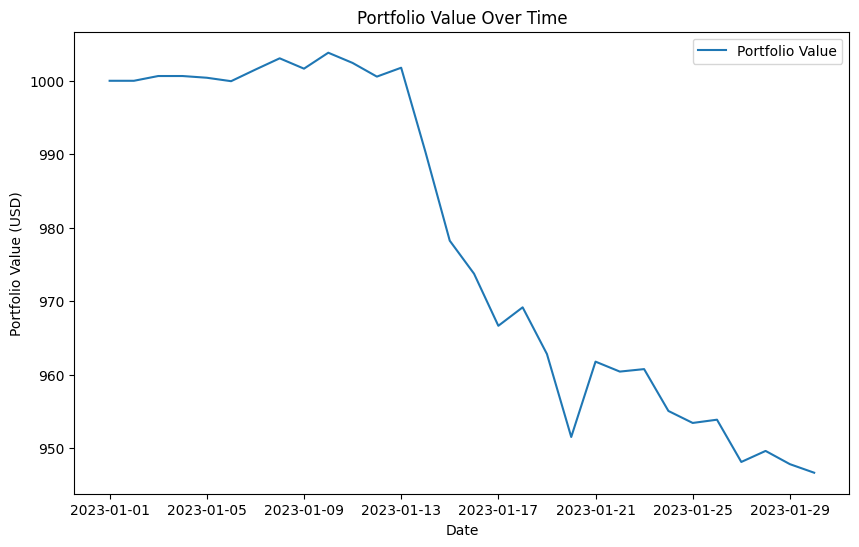

In [34]:
import numpy as np
import pandas as pd
import random
from transformers import pipeline

# Step 1: Set up the Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Step 2: Simulate cryptocurrency price data and news headlines
np.random.seed(42)
n_days = 30
prices = np.cumsum(np.random.normal(0, 1, n_days)) + 100  # Random walk for prices
dates = pd.date_range("2023-01-01", periods=n_days)
cryptos = ["Bitcoin", "Ethereum", "Ripple"]

# Create DataFrame for prices
price_df = pd.DataFrame({"Date": dates, "Price": prices, "Crypto": random.choice(cryptos)})

# Simulate news headlines with varying sentiment
news_headlines = [
    "Bitcoin surges as market confidence grows",
    "Ethereum faces regulatory challenges",
    "Ripple's new partnership sparks optimism",
    "Crypto market crashes amid global tension",
    "Experts predict a downturn for Bitcoin",
    "Ethereum shows signs of recovery",
    "Ripple experiences volatile trading patterns"
]
news_data = [{"Date": date, "Crypto": random.choice(cryptos), "Headline": random.choice(news_headlines)} for date in dates]

# Step 3: Analyze sentiment of each news headline
def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to news data
for news in news_data:
    sentiment, score = analyze_sentiment(news["Headline"])
    news["Sentiment"] = sentiment
    news["Sentiment_Score"] = score

news_df = pd.DataFrame(news_data)

# Step 4: Define investment decision rules based on sentiment
def investment_decision(sentiment, score):
    if sentiment == "POSITIVE" and score > 0.8:
        return "Buy"
    elif sentiment == "NEGATIVE" and score > 0.8:
        return "Sell"
    else:
        return "Hold"

# Apply investment decision logic
news_df["Decision"] = news_df.apply(lambda row: investment_decision(row["Sentiment"], row["Sentiment_Score"]), axis=1)

# Merge price and decision data
merged_df = pd.merge(price_df, news_df[['Date', 'Decision']], on='Date')

# Step 5: Simulate trading actions and calculate portfolio performance
initial_cash = 1000  # Initial cash in USD
crypto_holding = 0   # Initial crypto holding
cash = initial_cash
portfolio_values = []  # Track portfolio value each day

for _, row in merged_df.iterrows():
    price = row["Price"]
    decision = row["Decision"]

    if decision == "Buy" and cash > price:  # Buy one unit if cash allows
        crypto_holding += 1
        cash -= price
    elif decision == "Sell" and crypto_holding > 0:  # Sell one unit if holding any
        crypto_holding -= 1
        cash += price

    # Calculate current portfolio value (cash + crypto holdings in USD)
    portfolio_value = cash + crypto_holding * price
    portfolio_values.append(portfolio_value)

# Step 6: Performance Analysis
portfolio_df = pd.DataFrame({"Date": merged_df["Date"], "Portfolio Value": portfolio_values})
portfolio_df["Daily Return"] = portfolio_df["Portfolio Value"].pct_change()

# Calculate ROI
roi = (portfolio_df["Portfolio Value"].iloc[-1] - initial_cash) / initial_cash

# Calculate Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
mean_daily_return = portfolio_df["Daily Return"].mean()
std_dev_daily_return = portfolio_df["Daily Return"].std()
sharpe_ratio = (mean_daily_return / std_dev_daily_return) * np.sqrt(252)  # Annualize Sharpe Ratio

# Display performance metrics
performance_metrics = {
    "Final Portfolio Value": portfolio_df["Portfolio Value"].iloc[-1],
    "ROI": roi,
    "Sharpe Ratio": sharpe_ratio
}

# Display performance metrics and plot portfolio value over time
print(performance_metrics)

# Plot portfolio value over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(portfolio_df["Date"], portfolio_df["Portfolio Value"], label="Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()


We can test multiple trading strategies by defining different approaches to make buy, hold, or sell decisions based on the model’s sentiment analysis. Here are a few trading strategies we could try:

1. **Sentiment-Based Strategy**: Uses a threshold on the sentiment score for buy/sell decisions.
2. **Mean Reversion Strategy**: Buys if prices fall below a moving average and sells when prices rise above it.
3. **Momentum Strategy**: Buys when prices are increasing (uptrend) and sells on a downtrend.

Each strategy can be implemented as a function that takes sentiment, price, and other contextual factors as inputs to make decisions.

Here’s the code to set up these strategies and compare their performances:

```python
import numpy as np
import pandas as pd
import random
from transformers import pipeline
import matplotlib.pyplot as plt

# Step 1: Set up Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Step 2: Simulate price data and news headlines
np.random.seed(42)
n_days = 30
prices = np.cumsum(np.random.normal(0, 1, n_days)) + 100  # Random walk
dates = pd.date_range("2023-01-01", periods=n_days)
cryptos = ["Bitcoin", "Ethereum", "Ripple"]

# Create DataFrame for prices
price_df = pd.DataFrame({"Date": dates, "Price": prices, "Crypto": random.choice(cryptos)})

# Simulate news headlines
news_headlines = [
    "Bitcoin surges as market confidence grows",
    "Ethereum faces regulatory challenges",
    "Ripple's new partnership sparks optimism",
    "Crypto market crashes amid global tension",
    "Experts predict a downturn for Bitcoin",
    "Ethereum shows signs of recovery",
    "Ripple experiences volatile trading patterns"
]
news_data = [{"Date": date, "Crypto": random.choice(cryptos), "Headline": random.choice(news_headlines)} for date in dates]

# Step 3: Sentiment analysis on each headline
def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to news data
for news in news_data:
    sentiment, score = analyze_sentiment(news["Headline"])
    news["Sentiment"] = sentiment
    news["Sentiment_Score"] = score

news_df = pd.DataFrame(news_data)

# Step 4: Merge price and sentiment data
merged_df = pd.merge(price_df, news_df[['Date', 'Sentiment', 'Sentiment_Score']], on='Date')

# Step 5: Define trading strategies
def sentiment_based_strategy(sentiment, score, cash, crypto_holding, price):
    """ Buys on strong positive sentiment, sells on strong negative sentiment. """
    if sentiment == "POSITIVE" and score > 0.8 and cash > price:
        return "Buy"
    elif sentiment == "NEGATIVE" and score > 0.8 and crypto_holding > 0:
        return "Sell"
    else:
        return "Hold"

def mean_reversion_strategy(price, cash, crypto_holding, short_ma, long_ma):
    """ Buys when price falls below a moving average, sells when above it. """
    if price < short_ma and cash > price:
        return "Buy"
    elif price > long_ma and crypto_holding > 0:
        return "Sell"
    else:
        return "Hold"

def momentum_strategy(price, prev_price, cash, crypto_holding):
    """ Buys on uptrend, sells on downtrend. """
    if price > prev_price and cash > price:
        return "Buy"
    elif price < prev_price and crypto_holding > 0:
        return "Sell"
    else:
        return "Hold"

# Step 6: Apply each strategy and track performance
def apply_strategy(strategy_func):
    initial_cash = 1000
    cash = initial_cash
    crypto_holding = 0
    portfolio_values = []
    short_window = 5
    long_window = 10
    
    # Calculate moving averages for mean reversion
    merged_df["Short_MA"] = merged_df["Price"].rolling(window=short_window).mean()
    merged_df["Long_MA"] = merged_df["Price"].rolling(window=long_window).mean()
    
    for i, row in merged_df.iterrows():
        price = row["Price"]
        prev_price = merged_df["Price"].iloc[i - 1] if i > 0 else price
        decision = strategy_func(
            row["Sentiment"], row["Sentiment_Score"], cash, crypto_holding, price
        ) if strategy_func == sentiment_based_strategy else (
            strategy_func(price, cash, crypto_holding, row["Short_MA"], row["Long_MA"])
            if strategy_func == mean_reversion_strategy
            else momentum_strategy(price, prev_price, cash, crypto_holding)
        )
        
        # Execute the decision
        if decision == "Buy" and cash > price:
            crypto_holding += 1
            cash -= price
        elif decision == "Sell" and crypto_holding > 0:
            crypto_holding -= 1
            cash += price
        
        # Track portfolio value
        portfolio_value = cash + crypto_holding * price
        portfolio_values.append(portfolio_value)
    
    # Return portfolio value data
    return pd.DataFrame({"Date": merged_df["Date"], "Portfolio Value": portfolio_values})

# Apply each strategy
sentiment_results = apply_strategy(sentiment_based_strategy)
mean_reversion_results = apply_strategy(mean_reversion_strategy)
momentum_results = apply_strategy(momentum_strategy)

# Plot portfolio values over time for each strategy
plt.figure(figsize=(12, 8))
plt.plot(sentiment_results["Date"], sentiment_results["Portfolio Value"], label="Sentiment-Based Strategy")
plt.plot(mean_reversion_results["Date"], mean_reversion_results["Portfolio Value"], label="Mean Reversion Strategy")
plt.plot(momentum_results["Date"], momentum_results["Portfolio Value"], label="Momentum Strategy")
plt.title("Portfolio Value Over Time by Strategy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()

# Performance Summary
def performance_summary(portfolio_df, initial_cash=1000):
    roi = (portfolio_df["Portfolio Value"].iloc[-1] - initial_cash) / initial_cash
    daily_returns = portfolio_df["Portfolio Value"].pct_change()
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
    return {"Final Portfolio Value": portfolio_df["Portfolio Value"].iloc[-1], "ROI": roi, "Sharpe Ratio": sharpe_ratio}

sentiment_performance = performance_summary(sentiment_results)
mean_reversion_performance = performance_summary(mean_reversion_results)
momentum_performance = performance_summary(momentum_results)

# Print performance metrics for each strategy
print("Sentiment-Based Strategy:", sentiment_performance)
print("Mean Reversion Strategy:", mean_reversion_performance)
print("Momentum Strategy:", momentum_performance)
```

### Explanation of Strategies

1. **Sentiment-Based Strategy**: Uses strong positive or negative sentiment to make buy or sell decisions.
2. **Mean Reversion Strategy**: Buys when the price falls below a short-term moving average and sells when it rises above a long-term moving average, assuming prices revert to the mean.
3. **Momentum Strategy**: Buys during an uptrend and sells during a downtrend, capitalizing on market momentum.

### Performance Comparison

1. **Portfolio Value Plot**: Shows how each strategy’s portfolio value changes over time.
2. **Performance Metrics**:
   - **Final Portfolio Value**: The ending value of the portfolio after all trades.
   - **ROI**: Return on Investment over the period.
   - **Sharpe Ratio**: Measures risk-adjusted returns, with higher values indicating better risk-adjusted performance.

This setup allows comparison of different strategies and their effectiveness in maximizing portfolio value.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


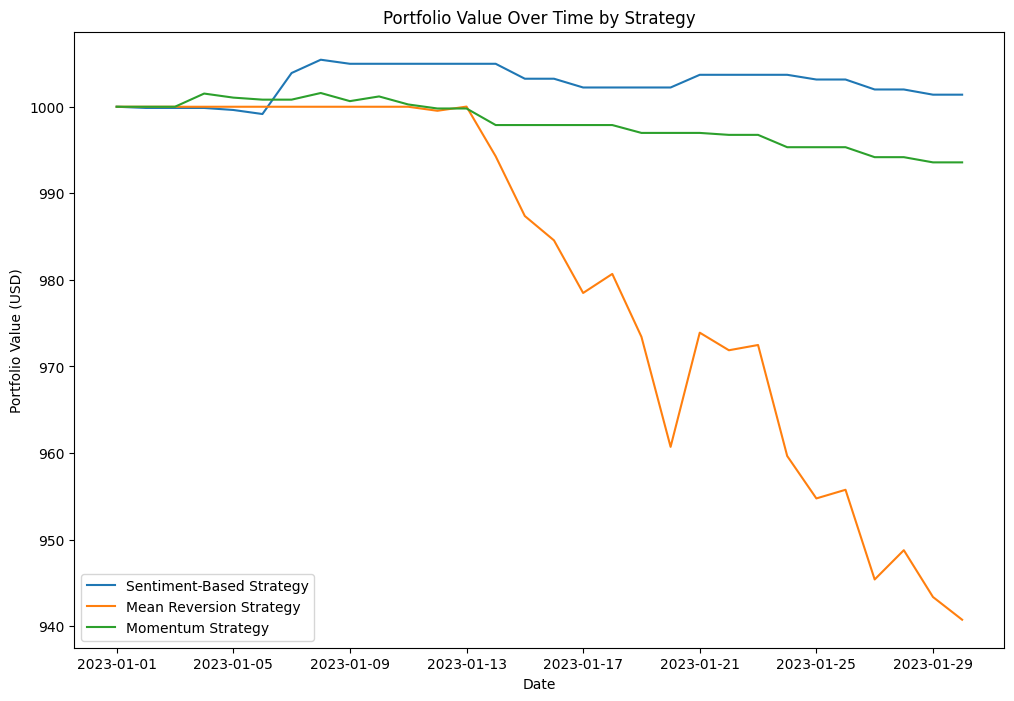

Sentiment-Based Strategy: {'Final Portfolio Value': 1001.394226753308, 'ROI': 0.0013942267533079758, 'Sharpe Ratio': 0.7073129977603179}
Mean Reversion Strategy: {'Final Portfolio Value': 940.7491429490537, 'ROI': -0.05925085705094625, 'Sharpe Ratio': -6.222232885543147}
Momentum Strategy: {'Final Portfolio Value': 993.5756059374658, 'ROI': -0.006424394062534248, 'Sharpe Ratio': -5.320614181436022}


In [35]:
import numpy as np
import pandas as pd
import random
from transformers import pipeline
import matplotlib.pyplot as plt

# Step 1: Set up Hugging Face sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Step 2: Simulate price data and news headlines
np.random.seed(42)
n_days = 30
prices = np.cumsum(np.random.normal(0, 1, n_days)) + 100  # Random walk
dates = pd.date_range("2023-01-01", periods=n_days)
cryptos = ["Bitcoin", "Ethereum", "Ripple"]

# Create DataFrame for prices
price_df = pd.DataFrame({"Date": dates, "Price": prices, "Crypto": random.choice(cryptos)})

# Simulate news headlines
news_headlines = [
    "Bitcoin surges as market confidence grows",
    "Ethereum faces regulatory challenges",
    "Ripple's new partnership sparks optimism",
    "Crypto market crashes amid global tension",
    "Experts predict a downturn for Bitcoin",
    "Ethereum shows signs of recovery",
    "Ripple experiences volatile trading patterns"
]
news_data = [{"Date": date, "Crypto": random.choice(cryptos), "Headline": random.choice(news_headlines)} for date in dates]

# Step 3: Sentiment analysis on each headline
def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to news data
for news in news_data:
    sentiment, score = analyze_sentiment(news["Headline"])
    news["Sentiment"] = sentiment
    news["Sentiment_Score"] = score

news_df = pd.DataFrame(news_data)

# Step 4: Merge price and sentiment data
merged_df = pd.merge(price_df, news_df[['Date', 'Sentiment', 'Sentiment_Score']], on='Date')

# Step 5: Define trading strategies
def sentiment_based_strategy(sentiment, score, cash, crypto_holding, price):
    """ Buys on strong positive sentiment, sells on strong negative sentiment. """
    if sentiment == "POSITIVE" and score > 0.8 and cash > price:
        return "Buy"
    elif sentiment == "NEGATIVE" and score > 0.8 and crypto_holding > 0:
        return "Sell"
    else:
        return "Hold"

def mean_reversion_strategy(price, cash, crypto_holding, short_ma, long_ma):
    """ Buys when price falls below a moving average, sells when above it. """
    if price < short_ma and cash > price:
        return "Buy"
    elif price > long_ma and crypto_holding > 0:
        return "Sell"
    else:
        return "Hold"

def momentum_strategy(price, prev_price, cash, crypto_holding):
    """ Buys on uptrend, sells on downtrend. """
    if price > prev_price and cash > price:
        return "Buy"
    elif price < prev_price and crypto_holding > 0:
        return "Sell"
    else:
        return "Hold"

# Step 6: Apply each strategy and track performance
def apply_strategy(strategy_func):
    initial_cash = 1000
    cash = initial_cash
    crypto_holding = 0
    portfolio_values = []
    short_window = 5
    long_window = 10

    # Calculate moving averages for mean reversion
    merged_df["Short_MA"] = merged_df["Price"].rolling(window=short_window).mean()
    merged_df["Long_MA"] = merged_df["Price"].rolling(window=long_window).mean()

    for i, row in merged_df.iterrows():
        price = row["Price"]
        prev_price = merged_df["Price"].iloc[i - 1] if i > 0 else price
        decision = strategy_func(
            row["Sentiment"], row["Sentiment_Score"], cash, crypto_holding, price
        ) if strategy_func == sentiment_based_strategy else (
            strategy_func(price, cash, crypto_holding, row["Short_MA"], row["Long_MA"])
            if strategy_func == mean_reversion_strategy
            else momentum_strategy(price, prev_price, cash, crypto_holding)
        )

        # Execute the decision
        if decision == "Buy" and cash > price:
            crypto_holding += 1
            cash -= price
        elif decision == "Sell" and crypto_holding > 0:
            crypto_holding -= 1
            cash += price

        # Track portfolio value
        portfolio_value = cash + crypto_holding * price
        portfolio_values.append(portfolio_value)

    # Return portfolio value data
    return pd.DataFrame({"Date": merged_df["Date"], "Portfolio Value": portfolio_values})

# Apply each strategy
sentiment_results = apply_strategy(sentiment_based_strategy)
mean_reversion_results = apply_strategy(mean_reversion_strategy)
momentum_results = apply_strategy(momentum_strategy)

# Plot portfolio values over time for each strategy
plt.figure(figsize=(12, 8))
plt.plot(sentiment_results["Date"], sentiment_results["Portfolio Value"], label="Sentiment-Based Strategy")
plt.plot(mean_reversion_results["Date"], mean_reversion_results["Portfolio Value"], label="Mean Reversion Strategy")
plt.plot(momentum_results["Date"], momentum_results["Portfolio Value"], label="Momentum Strategy")
plt.title("Portfolio Value Over Time by Strategy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()

# Performance Summary
def performance_summary(portfolio_df, initial_cash=1000):
    roi = (portfolio_df["Portfolio Value"].iloc[-1] - initial_cash) / initial_cash
    daily_returns = portfolio_df["Portfolio Value"].pct_change()
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
    return {"Final Portfolio Value": portfolio_df["Portfolio Value"].iloc[-1], "ROI": roi, "Sharpe Ratio": sharpe_ratio}

sentiment_performance = performance_summary(sentiment_results)
mean_reversion_performance = performance_summary(mean_reversion_results)
momentum_performance = performance_summary(momentum_results)

# Print performance metrics for each strategy
print("Sentiment-Based Strategy:", sentiment_performance)
print("Mean Reversion Strategy:", mean_reversion_performance)
print("Momentum Strategy:", momentum_performance)


## UTXO Real-world Data Demo

To guide you in creating a Colab notebook for exploring and analyzing the Bitcoin UTXO dataset, here’s a Python code template. This code covers data exploration, statistical analysis, visualizations, and a basic machine learning model using pandas, matplotlib, and scikit-learn.

First, upload the dataset to your Google Colab session or read it directly if it’s accessible by URL.

```python
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from URL
url = 'https://raw.githubusercontent.com/SciEcon/UTXO/refs/heads/main/bitcoin/BitcoinResultUTXO2021-02-10.csv'
data = pd.read_csv(url)

# Display the dataset in an interactive table format
data_table.DataTable(data, include_index=False)

# Initial Exploration
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Data Cleaning
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data.set_index('date', inplace=True)

# Check for any missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualization: UTXO count distributions by cohort
plt.figure(figsize=(12, 6))
data.hist(bins=30, edgecolor='black', grid=False, figsize=(15,10))
plt.suptitle('UTXO Age Cohorts - BTC Counts Distribution')
plt.show()

# Time Series Plot of Selected Columns
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=f'Cohort {column}')
plt.xlabel('Date')
plt.ylabel('BTC Count')
plt.title('UTXO Age Cohorts Over Time')
plt.legend()
plt.show()

# Statistical Analysis - Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of UTXO Age Cohorts')
plt.show()

# Basic Machine Learning - Predicting `-9` cohort BTC count from other columns
# 1. Prepare data by selecting features and target
X = data.drop(columns=['-9'])  # Features: all other columns except `-9`
y = data['-9']  # Target: `-9`

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted BTC Counts for `-9` Cohort")
plt.show()
```

### Explanation of the Code
1. **Data Loading and Display**: Loads the data directly from the URL and displays it in an interactive table format using `data_table.DataTable`.
2. **Data Cleaning and Conversion**: The `date` column is converted to a `datetime` format, set as the index for time series analysis.
3. **Statistical Exploration**: Basic descriptive statistics and missing value checks.
4. **Visualization**:
   - Histograms of BTC count distributions for each cohort.
   - A time series plot for all BTC age cohorts.
   - Correlation matrix to understand relationships among UTXO age cohorts.
5. **Machine Learning**:
   - Predicts the `-9` cohort using linear regression based on other cohort features.
   - Evaluation with Mean Squared Error (MSE) and R-squared score.
   - Scatter plot to visualize predicted vs actual values for validation.

This code is a starting point and can be customized to delve deeper into specific analysis or different machine learning models. Let me know if you'd like additional enhancements or more detailed insights on specific sections!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4422 entries, 0 to 40
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4422 non-null   object 
 1   -9      4422 non-null   float64
 2   -7      4422 non-null   float64
 3   -5      4422 non-null   float64
 4   -3      4422 non-null   float64
 5   -1      4422 non-null   float64
 6   1       4422 non-null   float64
 7   3       4422 non-null   float64
 8   5       4422 non-null   float64
 9   7       4422 non-null   float64
 10  9       4422 non-null   float64
 11  11      4422 non-null   float64
dtypes: float64(11), object(1)
memory usage: 449.1+ KB
None

Summary Statistics:
                  -9            -7            -5            -3            -1  \
count    4422.000000  4.422000e+03  4.422000e+03  4.422000e+03  4.422000e+03   
mean   191253.091109  1.399070e+06  1.405597e+06  1.323799e+06  1.718608e+06   
std    123918.627957  6.772462e+05  6.67

<Figure size 1200x600 with 0 Axes>

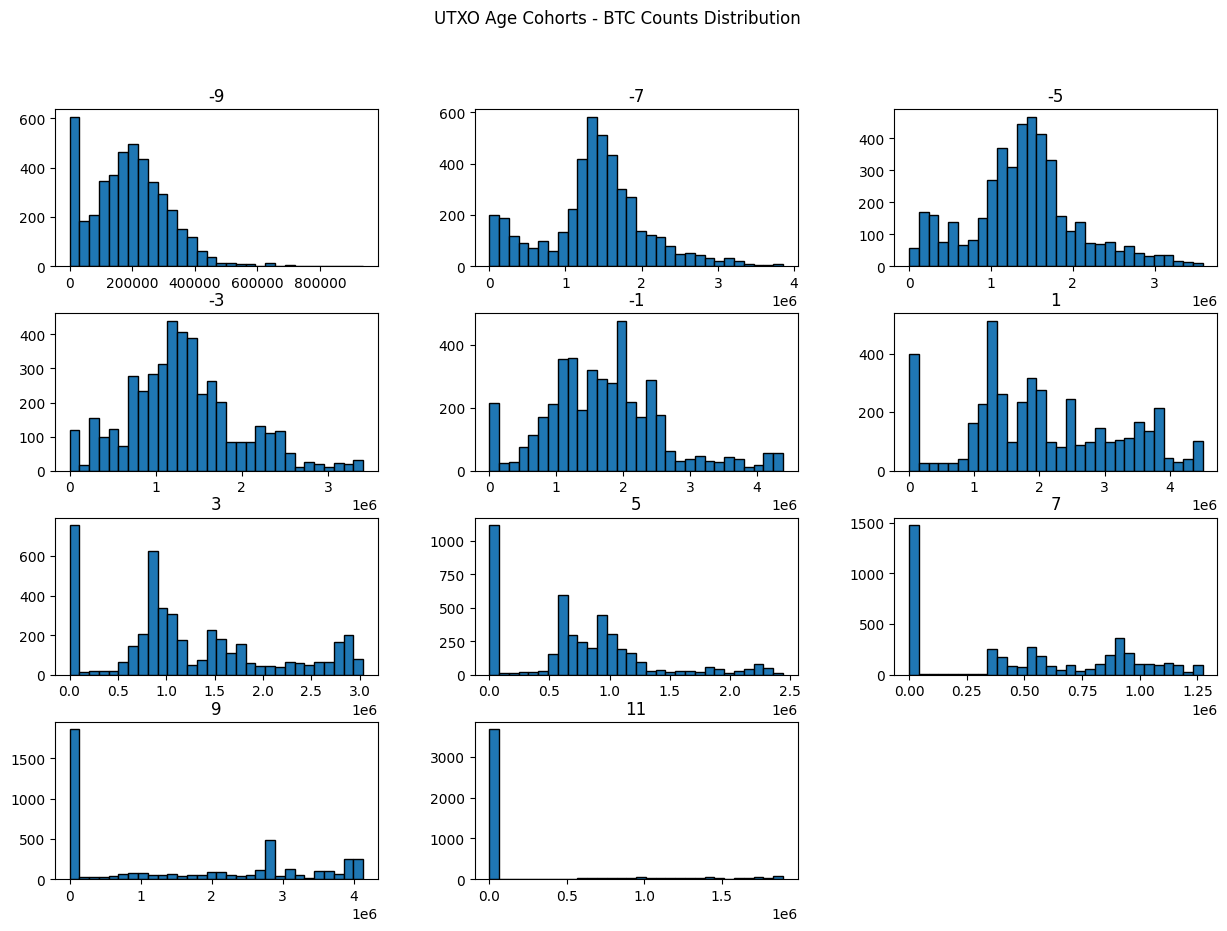

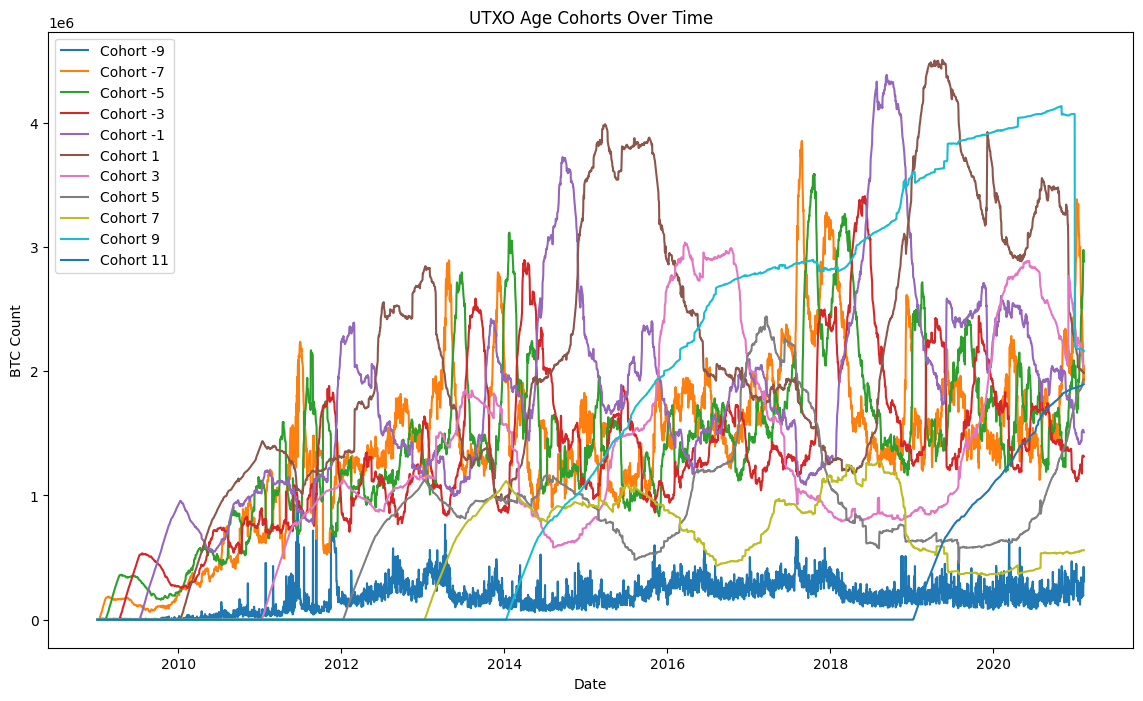

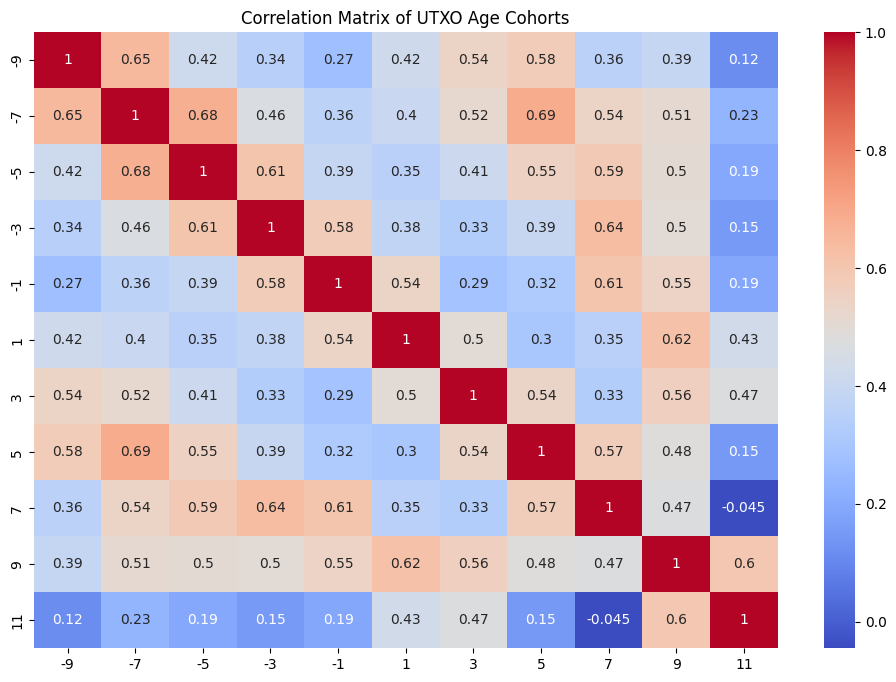

Linear Regression Model Evaluation:
Mean Squared Error: 7727487135.912727
R-squared: 0.5201212245513899


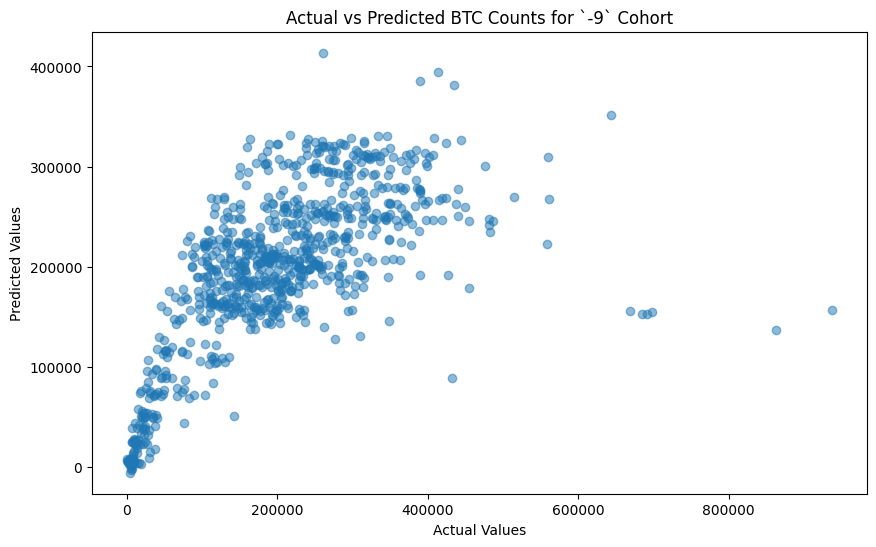

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from URL
url = 'https://raw.githubusercontent.com/SciEcon/UTXO/refs/heads/main/bitcoin/BitcoinResultUTXO2021-02-10.csv'
data = pd.read_csv(url, index_col="Unnamed: 0")

# Display the dataset in an interactive table format
data_table.DataTable(data, include_index=False)

# Initial Exploration
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Data Cleaning
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

data.set_index('date', inplace=True)

# Check for any missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualization: UTXO count distributions by cohort
plt.figure(figsize=(12, 6))
data.hist(bins=30, edgecolor='black', grid=False, figsize=(15,10))
plt.suptitle('UTXO Age Cohorts - BTC Counts Distribution')
plt.show()

# Time Series Plot of Selected Columns
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=f'Cohort {column}')
plt.xlabel('Date')
plt.ylabel('BTC Count')
plt.title('UTXO Age Cohorts Over Time')
plt.legend()
plt.show()

# Statistical Analysis - Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of UTXO Age Cohorts')
plt.show()

# Basic Machine Learning - Predicting `-9` cohort BTC count from other columns
# 1. Prepare data by selecting features and target
X = data.drop(columns=['-9'])  # Features: all other columns except `-9`
y = data['-9']  # Target: `-9`

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted BTC Counts for `-9` Cohort")
plt.show()


To modify the code to use descriptive labels for each variable, I will create a dictionary mapping each variable name to its descriptive label and then update the code to use these labels in all visualizations.

Here is the revised code:

```python
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from URL
url = 'https://raw.githubusercontent.com/SciEcon/UTXO/refs/heads/main/bitcoin/BitcoinResultUTXO2021-02-10.csv'
data = pd.read_csv(url)

# Data dictionary mapping variable names to descriptive labels
labels = {
    'date': 'Date of cohort data queried',
    '-9': 'UTXOs alive < 1 day',
    '-7': 'UTXOs alive > 1 day, < 1 month',
    '-5': 'UTXOs alive > 1 month, < 3 months',
    '-3': 'UTXOs alive > 3 months, < 6 months',
    '-1': 'UTXOs alive > 6 months, < 1 year',
    '1': 'UTXOs alive > 1 year, < 2 years',
    '3': 'UTXOs alive > 2 years, < 3 years',
    '5': 'UTXOs alive > 3 years, < 4 years',
    '7': 'UTXOs alive > 4 years, < 5 years',
    '9': 'UTXOs alive > 5 years, < 10 years',
    '11': 'UTXOs alive > 10 years'
}

# Rename columns in the dataframe
data.rename(columns=labels, inplace=True)

# Display the dataset in an interactive table format
data_table.DataTable(data, include_index=False)

# Initial Exploration
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Data Cleaning
# Convert date to datetime format
data['Date of cohort data queried'] = pd.to_datetime(data['Date of cohort data queried'], format='%Y-%m-%d')
data.set_index('Date of cohort data queried', inplace=True)

# Check for any missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualization: UTXO count distributions by cohort
plt.figure(figsize=(12, 6))
data.hist(bins=30, edgecolor='black', grid=False, figsize=(15,10))
plt.suptitle('UTXO Age Cohorts - BTC Counts Distribution')
plt.show()

# Time Series Plot of Selected Columns
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=labels.get(column, column))  # Using descriptive label if available
plt.xlabel('Date')
plt.ylabel('BTC Count')
plt.title('UTXO Age Cohorts Over Time')
plt.legend()
plt.show()

# Statistical Analysis - Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', xticklabels=list(labels.values())[1:], yticklabels=list(labels.values())[1:])
plt.title('Correlation Matrix of UTXO Age Cohorts')
plt.show()

# Basic Machine Learning - Predicting `UTXOs alive < 1 day` BTC count from other columns
# 1. Prepare data by selecting features and target
target_label = 'UTXOs alive < 1 day'
X = data.drop(columns=[target_label])  # Features: all other columns except target
y = data[target_label]  # Target: the specific cohort

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted BTC Counts for 'UTXOs alive < 1 day'")
plt.show()
```

### Explanation of Changes
1. **Mapping Descriptive Labels**: A dictionary `labels` maps each variable name to its descriptive label based on Table S2.
2. **Renaming Columns**: `data.rename(columns=labels, inplace=True)` renames the columns in the DataFrame to use the descriptive labels.
3. **Visualization Labels**: Each visualization references the labels dictionary to display descriptive labels instead of variable names.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4422 entries, 0 to 40
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date of cohort data queried         4422 non-null   object 
 1   UTXOs alive < 1 day                 4422 non-null   float64
 2   UTXOs alive > 1 day, < 1 month      4422 non-null   float64
 3   UTXOs alive > 1 month, < 3 months   4422 non-null   float64
 4   UTXOs alive > 3 months, < 6 months  4422 non-null   float64
 5   UTXOs alive > 6 months, < 1 year    4422 non-null   float64
 6   UTXOs alive > 1 year, < 2 years     4422 non-null   float64
 7   UTXOs alive > 2 years, < 3 years    4422 non-null   float64
 8   UTXOs alive > 3 years, < 4 years    4422 non-null   float64
 9   UTXOs alive > 4 years, < 5 years    4422 non-null   float64
 10  UTXOs alive > 5 years, < 10 years   4422 non-null   float64
 11  UTXOs alive > 10 years       

<Figure size 1200x600 with 0 Axes>

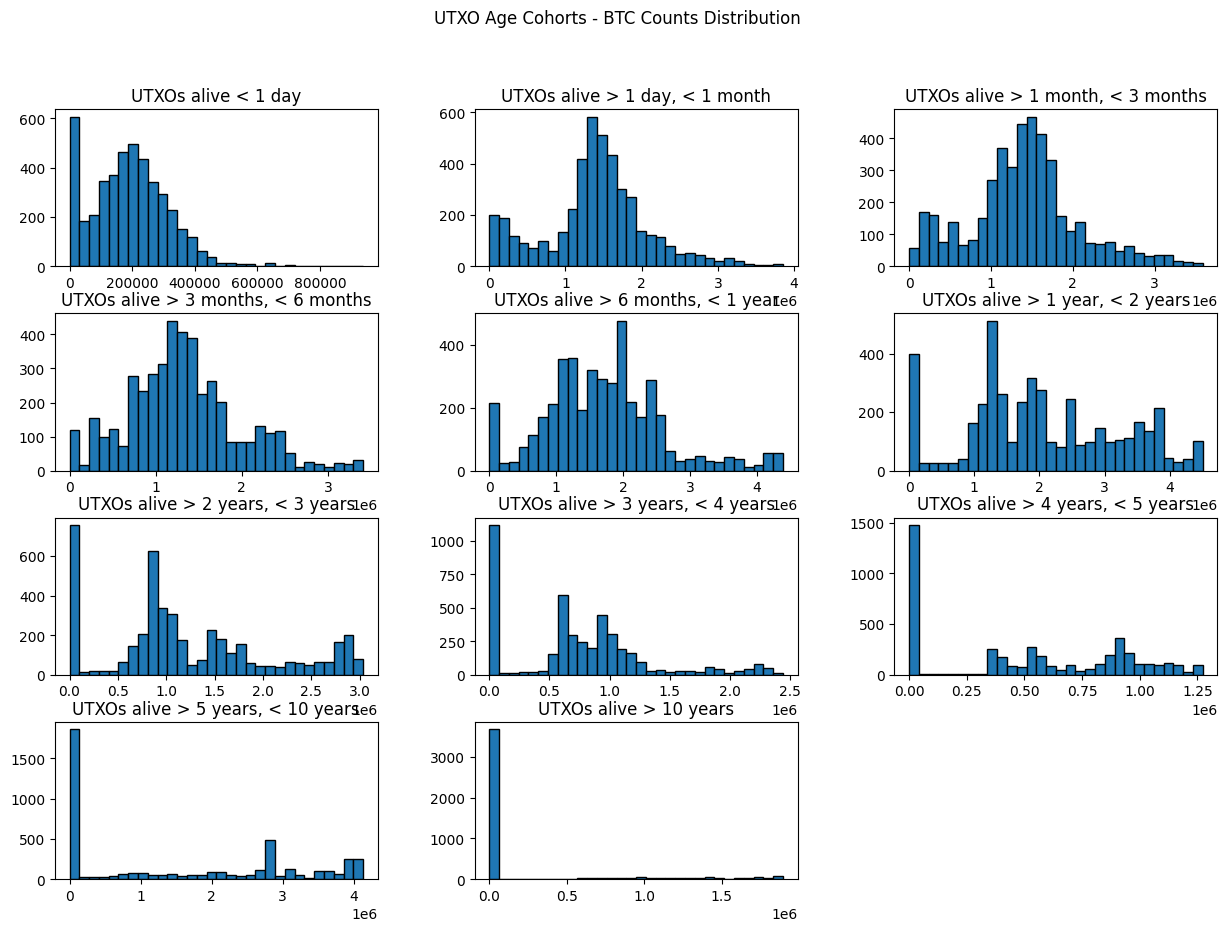

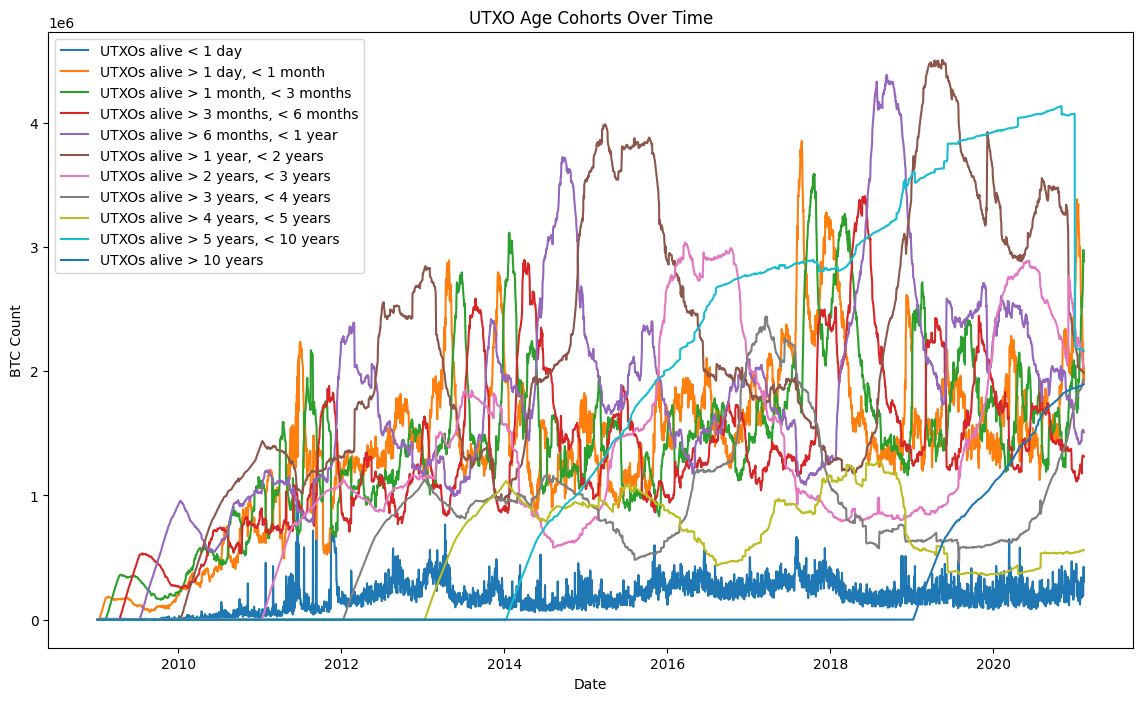

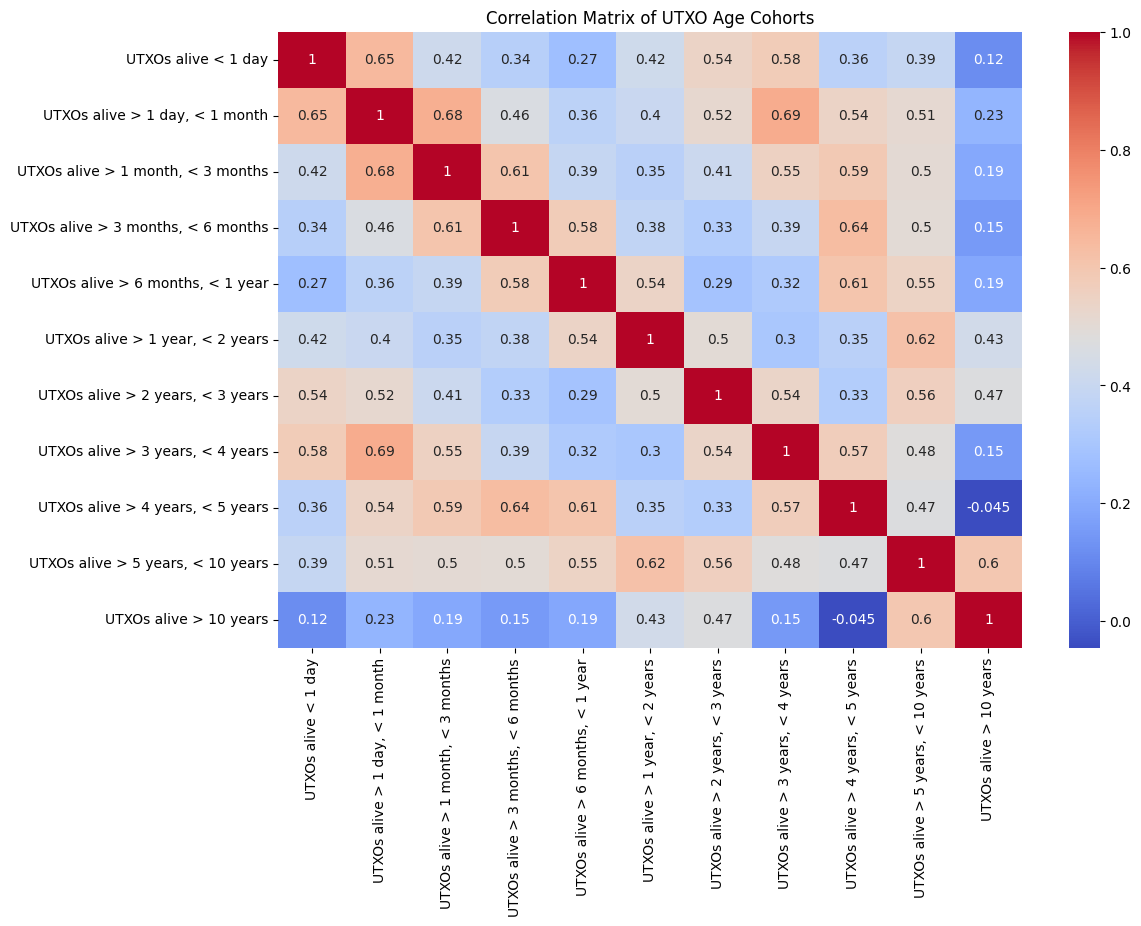

Linear Regression Model Evaluation:
Mean Squared Error: 7727487135.912727
R-squared: 0.5201212245513899


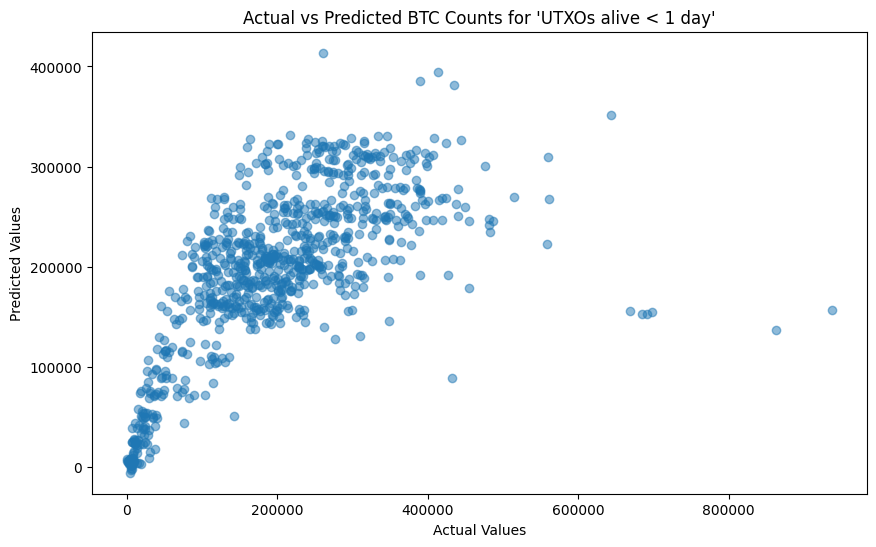

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from URL
url = 'https://raw.githubusercontent.com/SciEcon/UTXO/refs/heads/main/bitcoin/BitcoinResultUTXO2021-02-10.csv'
data = pd.read_csv(url, index_col="Unnamed: 0")

# Data dictionary mapping variable names to descriptive labels
labels = {
    'date': 'Date of cohort data queried',
    '-9': 'UTXOs alive < 1 day',
    '-7': 'UTXOs alive > 1 day, < 1 month',
    '-5': 'UTXOs alive > 1 month, < 3 months',
    '-3': 'UTXOs alive > 3 months, < 6 months',
    '-1': 'UTXOs alive > 6 months, < 1 year',
    '1': 'UTXOs alive > 1 year, < 2 years',
    '3': 'UTXOs alive > 2 years, < 3 years',
    '5': 'UTXOs alive > 3 years, < 4 years',
    '7': 'UTXOs alive > 4 years, < 5 years',
    '9': 'UTXOs alive > 5 years, < 10 years',
    '11': 'UTXOs alive > 10 years'
}

# Rename columns in the dataframe
data.rename(columns=labels, inplace=True)

# Display the dataset in an interactive table format
data_table.DataTable(data, include_index=False)

# Initial Exploration
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Data Cleaning
# Convert date to datetime format
data['Date of cohort data queried'] = pd.to_datetime(data['Date of cohort data queried'], format='%Y-%m-%d')
data.set_index('Date of cohort data queried', inplace=True)

# Check for any missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualization: UTXO count distributions by cohort
plt.figure(figsize=(12, 6))
data.hist(bins=30, edgecolor='black', grid=False, figsize=(15,10))
plt.suptitle('UTXO Age Cohorts - BTC Counts Distribution')
plt.show()

# Time Series Plot of Selected Columns
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=labels.get(column, column))  # Using descriptive label if available
plt.xlabel('Date')
plt.ylabel('BTC Count')
plt.title('UTXO Age Cohorts Over Time')
plt.legend()
plt.show()

# Statistical Analysis - Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', xticklabels=list(labels.values())[1:], yticklabels=list(labels.values())[1:])
plt.title('Correlation Matrix of UTXO Age Cohorts')
plt.show()

# Basic Machine Learning - Predicting `UTXOs alive < 1 day` BTC count from other columns
# 1. Prepare data by selecting features and target
target_label = 'UTXOs alive < 1 day'
X = data.drop(columns=[target_label])  # Features: all other columns except target
y = data[target_label]  # Target: the specific cohort

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted BTC Counts for 'UTXOs alive < 1 day'")
plt.show()
